## Other Mineral Deposit Process

### 1.Read MineralOccurences Dataset

[MineralOccurrences.csv](../data/raw/Dataset/GA/MineralOccurrences.csv) dataset contains over 19,000 mineral occurrence records sourced from Geoscience Australia. It spans across all Australian states and includes various types of mineral-related sites such as mines, deposits, and occurrences. Each record provides commodity information, geographic location (longitude and latitude in GDA94), and metadata such as accuracy, source, and classification.

Column Name: Description
- FID: Feature ID, a unique identifier for each mineral occurrence entry, often auto-generated by GIS software.
- ENO: Entity Number, an internal or external reference number tied to the occurrence record.
- OTHER_ID: Alternative ID, from the source system for cross-referencing.
- OCCURRENCE_NAME: The name of the mineral occurrence or site (e.g., “Cadjebut”).
- PROJECT: The geological survey or data acquisition project the occurrence belongs to.
- CLASS: Classification of the site, typically “deposit”, “occurrence”, “mine”, or other domain-specific categories.
- STATE: The Australian state or territory where the site is located (e.g., NSW, QLD).
- COMMODITY_CODES: Commodity abbreviations, such as "Cu" for Copper or "Au" for Gold.
- COMMODITY_NAMES: Full names of commodities found at the site (e.g., Copper, Gold, Silver).
- LONG_GDA94: Longitude of the site using the GDA94 geodetic coordinate system.
- LAT_GDA94: Latitude of the site using the GDA94 geodetic coordinate system.
- ACCURACY_M: Positional accuracy of the recorded location, in meters.
- SOURCE: The data provider or organization that published the record (e.g., Geoscience Australia).
- OCCURRENCE_LOCATION: WKT-formatted geometry string representing the site's geographic location (e.g., POINT(134.0 -27.0)).

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the mineral occurrence dataset
df_mineral_occurrences = pd.read_csv("../data/raw/Dataset/GA/MineralOccurrences.csv", encoding='ISO-8859-1')
df_mineral_occurrences.head()

C:\Users\John\AppData\Local\Temp\ipykernel_6220\3321177893.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mineral_occurrences = pd.read_csv("../data/raw/Dataset/GA/MineralOccurrences.csv", encoding='ISO-8859-1')


,FID,ENO,OTHER_ID,OCCURRENCE_NAME,PROJECT,CLASS,STATE,COMMODITY_CODES,COMMODITY_NAMES,LONG_GDA94,LAT_GDA94,ACCURACY_M,SOURCE,OCCURRENCE_LOCATION
0,MineralOccurrences.800473,800473,532422,UNNAMED 634637,NaN,ABANDONED MINE,QLD,Opl,Opal,144.6063,-27.4294,7.0,Queensland,POINT (-27.4294055556 144.6063)
1,MineralOccurrences.800474,800474,532423,UNNAMED 629639,NaN,ABANDONED MINE,QLD,Opl,Opal,144.6013,-27.4275,7.0,Queensland,POINT (-27.4274888889 144.6013138889)
2,MineralOccurrences.800475,800475,532424,UNNAMED 634637,NaN,ABANDONED MINE,QLD,Opl,Opal,144.6064,-27.4295,7.0,Queensland,POINT (-27.4294722222 144.6063805556)
3,MineralOccurrences.800476,800476,532425,UNNAMED 634637,NaN,ABANDONED MINE,QLD,Opl,Opal,144.6065,-27.4295,7.0,Queensland,POINT (-27.4295277778 144.6064583333)
4,MineralOccurrences.800477,800477,532426,UNNAMED 869862,NaN,ABANDONED MINE,QLD,Au,Gold,145.9190,-20.0177,10.0,Queensland,POINT (-20.0176833333 145.9190305556)


In [2]:
df_mineral_occurrences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193651 entries, 0 to 193650
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FID                  193651 non-null  object 
 1   ENO                  193651 non-null  int64  
 2   OTHER_ID             193651 non-null  object 
 3   OCCURRENCE_NAME      193651 non-null  object 
 4   PROJECT              37884 non-null   object 
 5   CLASS                149956 non-null  object 
 6   STATE                193651 non-null  object 
 7   COMMODITY_CODES      193651 non-null  object 
 8   COMMODITY_NAMES      193651 non-null  object 
 9   LONG_GDA94           193651 non-null  float64
 10  LAT_GDA94            193651 non-null  float64
 11  ACCURACY_M           193632 non-null  float64
 12  SOURCE               71409 non-null   object 
 13  OCCURRENCE_LOCATION  193651 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 20.7+ MB


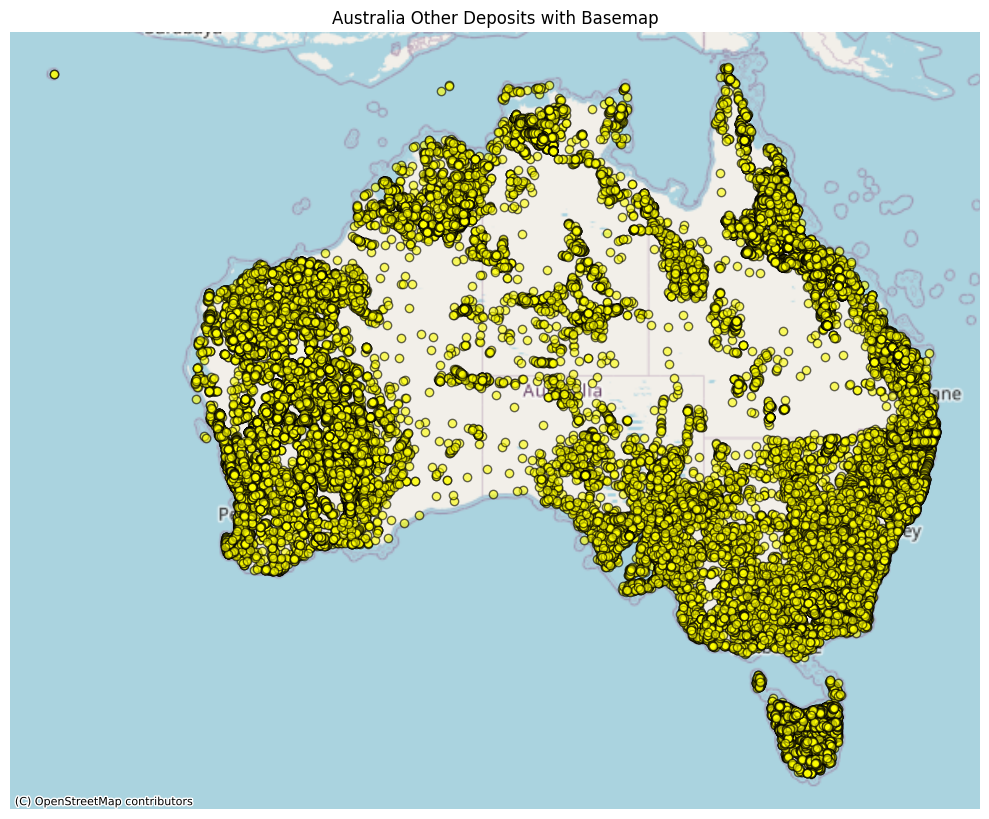

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_mineral_occurrences['LONG_GDA94'], df_mineral_occurrences['LAT_GDA94'])]
gdf = gpd.GeoDataFrame(df_mineral_occurrences, geometry=geometry, crs='EPSG:4326')  

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Australia Other Deposits with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [4]:
df_mineral_occurrences['CLASS'].unique()

array(['ABANDONED MINE', 'MINERAL OCCURRENCE', nan,
       'Alluvial/Placer Mine', 'Open Cut Quarry', 'Mine',
       'Occurrence/Anomaly', 'Prospect', 'occurrence', 'Deposit',
       'orogenic Au', 'greisen Sn', 'epithermal Au-Ag',
       'VHMS-bedded barite', 'Sil volcanogenic',
       'placer - Au dominated (fossil)', 'industrial - dimension stone',
       'construction material - undifferentiated', 'porphyry Cu-Au',
       'granitic - Ag dominant', 'unknown', 'skarn Pb-Zn-Ag-Cu',
       'polymetallic vein', 'VHMS-Kuroko', 'intrusion related Au',
       'W-Mo pipe/vein/dissem', 'unclassified Au',
       'industrial - diatomite', 'Vein Au', 'unclassified base metal',
       'placer - other', 'vein Cu', 'placer - Au dominated',
       '"Broken Hill type (Pb, Ag, Zn)"',
       'placer - Sn dominated (deep lead)', 'prospect',
       'Mine or Prospect', 'Mineral Occurrence', 'deposit',
       'Mineral Field', 'Area of alluvial workings',
       'Construction Materials', 'field', 'Tailings

### 2. Negative Sample Selection Strategy

To construct a reliable set of negative samples for mineral prospectivity modeling, we applied the following filtering criteria to the national-scale Australian mineral occurrence dataset:

#### 2.1. Filter by Site Classification (`CLASS` field)
Only sites with confirmed mineralization and development value were retained. Specifically:
- **CLASS = "Mine"** (active or historical mining operations)
- **CLASS = "Deposit"** (identified mineral deposits)

> ⛔ Sites classified as "Occurrence", "Prospect", "Showing", or other uncertain categories were excluded to ensure label integrity.


In [5]:
useful_classes_primary = [
    'Mine', 'MINE', 'Operating mine', 'OPERATING MINE',
    'Mine - Openpit', 'Mine - Other',
    'Operating Mine'
]

useful_classes_deposit = [
    'Deposit', 'deposit', 'DEPOSIT', 'Deposit - Unspecified',
    'mineral deposit'
]
valid_classes = useful_classes_primary + useful_classes_deposit

# Normalize class column (lowercased string for consistency)
df_mineral_occurrences['CLASS_normalized'] = df_mineral_occurrences['CLASS'].str.lower().str.strip()

# Define valid classes (lowercase for comparison)
valid_classes_lower = [cls.lower() for cls in valid_classes]

# Filter
df_filtered = df_mineral_occurrences[df_mineral_occurrences['CLASS_normalized'].isin(valid_classes_lower)]


#### 2.2. Exclude Commodities Related to Porphyry Copper Systems (`COMMODITY_NAMES` field)
To avoid contamination of negative samples with potential porphyry copper-related sites, we excluded all records involving the following commodities:
- **Copper**
- **Gold**
- **Silver**
- **Molybdenum**

> 📌 These elements are either primary or common by-products of porphyry copper systems and are therefore treated as potential positives, not suitable for the negative training set.

The remaining points were retained as negative sample candidates, subject to further spatial filtering (e.g., minimum distance from known porphyry copper occurrences) and stratified sampling by geological context.

In [11]:
exclude_keywords = ['copper', 'gold', 'silver', 'molybdenum']

mask = df_filtered['COMMODITY_NAMES'].str.lower().apply(
    lambda x: any(kw in x for kw in exclude_keywords) if pd.notnull(x) else False
)

df_negative_candidates = df_filtered[~mask]


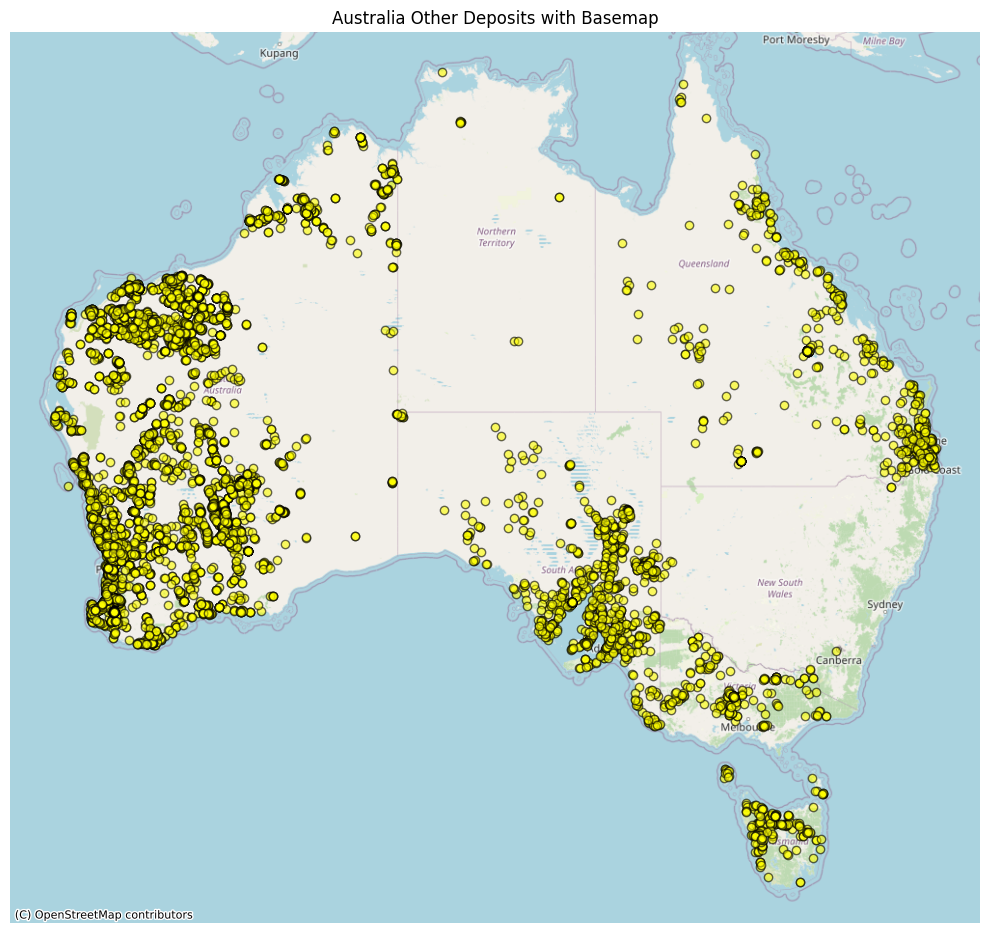

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_negative_candidates['LONG_GDA94'], df_negative_candidates['LAT_GDA94'])]
gdf = gpd.GeoDataFrame(df_negative_candidates, geometry=geometry, crs='EPSG:4326')  

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Australia Other Deposits with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()

### 3.Finalise Other Deposit Dataset

#### 3.1. Filter Useful Fields

In [12]:
# Define the list of fields to retain
columns_to_keep = [
    'OCCURRENCE_NAME', 'CLASS', 'STATE',
    'COMMODITY_NAMES', 'LONG_GDA94', 'LAT_GDA94'
]

# Filter the dataset to retain only the selected fields
df_negative_candidates_filtered = df_negative_candidates[columns_to_keep]

# Change LONGITUDE AND LATITUDE
df_negative_candidates_filtered = df_negative_candidates_filtered.rename(columns={
    'LONG_GDA94': 'LONGITUDE',
    'LAT_GDA94': 'LATITUDE'
})


In [13]:
df_negative_candidates_filtered.count()

OCCURRENCE_NAME    8452
CLASS              8452
STATE              8452
COMMODITY_NAMES    8452
LONGITUDE          8452
LATITUDE           8452
dtype: int64

#### 3.2. Spatial Filter

To ensure label purity in the training dataset, we applied a spatial filtering step to the negative sample candidates. Specifically:

- All negative sample points located **within 10 kilometers** of any known positive sample (i.e., known or inferred porphyry copper occurrences) were excluded.
- This was done to avoid including **false negatives**, as regions surrounding known deposits may still exhibit favorable geophysical or geochemical signatures.
- The filtering was performed using spatial operations on projected coordinates (EPSG:3577 – GDA94 / Australian Albers), allowing accurate distance-based exclusion.

The resulting filtered dataset contains only negative samples that are spatially independent from the positive training data, thereby improving the reliability of the classification model.


In [15]:
import geopandas as gpd
from shapely.geometry import Point

# load positive samples
positive_path = "../data/processed/positive_augmented_patch.csv"
df_positive = pd.read_csv(positive_path)

# 
gdf_positive = gpd.GeoDataFrame(
    df_positive,
    geometry=gpd.points_from_xy(df_positive['LONGITUDE'], df_positive['LATITUDE']),
    crs="EPSG:4326"
)

# Create Negative GeoDataFrame
gdf_negative = gpd.GeoDataFrame(
    df_negative_candidates_filtered,
    geometry=gpd.points_from_xy(df_negative_candidates_filtered['LONGITUDE'], df_negative_candidates_filtered['LATITUDE']),
    crs="EPSG:4326"
)

# cast to same CRS EPSG:3577
gdf_positive_proj = gdf_positive.to_crs("EPSG:3577")
gdf_negative_proj = gdf_negative.to_crs("EPSG:3577")

# Create 10km buffer around positive samples
buffer_distance = 20000  # meter
positive_buffer = gdf_positive_proj.buffer(buffer_distance)

from shapely.ops import unary_union
buffer_union = unary_union(positive_buffer)

gdf_negative_filtered = gdf_negative_proj[~gdf_negative_proj.geometry.within(buffer_union)]

gdf_negative_final = gdf_negative_filtered.to_crs("EPSG:4326")

gdf_negative_final = gdf_negative_final.drop(columns='geometry')
final_output_path = "../data/processed/negative_other_deposit_clean.csv"
gdf_negative_final.to_csv(final_output_path, index=False)


In [16]:
gdf_negative_final.count()

OCCURRENCE_NAME    8312
CLASS              8312
STATE              8312
COMMODITY_NAMES    8312
LONG_GDA94         8312
LAT_GDA94          8312
dtype: int64

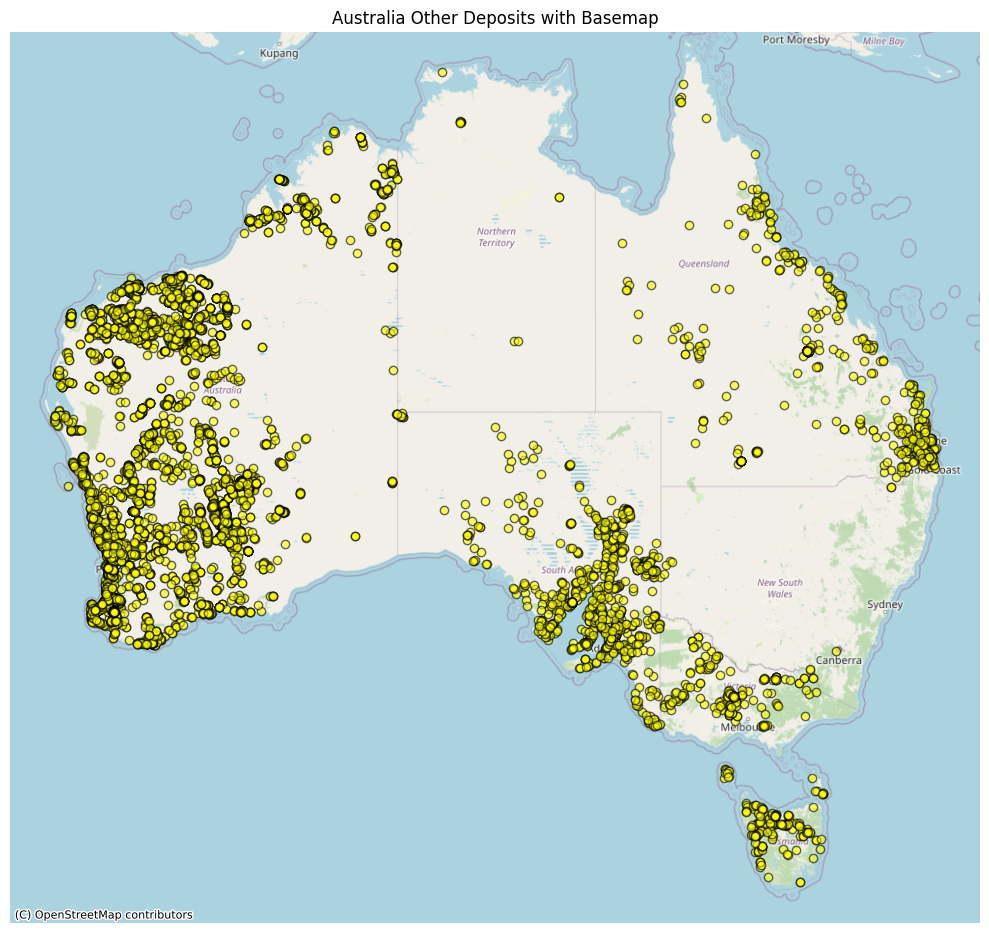

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    gdf_negative_final,
    geometry=gpd.points_from_xy(gdf_negative_final['LONGITUDE'], gdf_negative_final['LATITUDE']),
    crs="EPSG:4326"
)

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Australia Other Deposits with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()